cmocean:turbid sequential


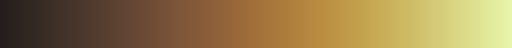

In [81]:
from cmap import Colormap

# more at https://cmap-docs.readthedocs.io/en/latest/catalog/

# case insensitive
mapped = ('crameri:vikO', 'crameri:corkO', 'crameri:berlin', 'crameri:vik',
          'colorbrewer:Blues', 'colorbrewer:BrBG', 'colorbrewer:Spectral',
          'matplotlib:coolwarm',
          'seaborn:icefire',
          'colorcet:CET_C3',
          'tol:nightfall', 'tol:sunset',
          'vispy:diverging', 'vispy:RdBu', 'vispy:RdYeBuCy', 
          'cmocean:curl', 'cmocean:thermal', 'cmocean:tarn', 'cmocean:turbid', 'cmocean:topo', 'cmocean:delta', 
          'cmocean:balance', 'cmocean:diff')

map_name = mapped[-2]
cm = Colormap(map_name)
print(map_name, cm.category)
cm

In [84]:
import numpy as np

categories = {'cyclic': 'ColorMap::Cyclic', 
              'sequential': 'ColorMap::Sequential', 
              'diverging': 'ColorMap::Divergent',
              'miscellaneous': 'ColorMap::Miscellaneous'}
path = "/home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/"

def generate_for(map_name):
    cm = Colormap(map_name)
    print(map_name + " -> category: ", cm.category)
    cm

    # Get RGB values for 256 colors
    colors = cm(np.linspace(0, 1, 256))

    cmap_filename = map_name.replace(':', '_') + '.inl'
    full_path_and_filename = path + cmap_filename
    file = open(full_path_and_filename, "w")

    write = file.write
    #write = print

    write("auto {} = New<ColorMap>(\n\t\"{}\",\n\t{},\n\tColorSequence{{".format(map_name.replace(':', '_'), map_name, categories[cm.category]))


    # Print RGB values
    for i, color in enumerate(colors):
        color = str(color).replace('[', '\t\tColor(').replace(']','),\n').replace(' 0', ', 0').replace(' 1.', ', 1.')
        write(f"{color}")

    write("\n\t}\n);")

    file.close()

    print("Seems like everything went fine for", full_path_and_filename)

In [85]:
for map_name in mapped:
    print("Generating for '" + map_name + "'")
    generate_for(map_name)
    print()

Generating for 'crameri:vikO'
crameri:vikO -> category:  cyclic
Seems like everything went fine for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/crameri_vikO.inl

Generating for 'crameri:corkO'
crameri:corkO -> category:  cyclic
Seems like everything went fine for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/crameri_corkO.inl

Generating for 'colorbrewer:Blues'
colorbrewer:Blues -> category:  sequential
Seems like everything went fine for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/colorbrewer_Blues.inl

Generating for 'colorcet:CET_C3'
colorcet:CET_C3 -> category:  cyclic
Seems like everything went fine for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/colorcet_CET_C3.inl

Generating for 'cmocean:curl'
cmocean:curl -> category:  diverging
Seems like everything went fine for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/cmocean_curl.inl

Generating for 'cmocean:thermal'
cmocean:thermal -> category:  seq

In [87]:
file = open(path + "all_colormaps.inl", 'w')
write = file.write
#write = print

write("// Generated automatically from https://github.com/tlambert03/cmap maps. Names are kept original, copyright can be verified at site.\n")

for map_name in mapped:
    cmap_filename = map_name.replace(':', '_') + '.inl'
    full_path_and_filename = path + cmap_filename
    write('\n#include "{}.inl"'.format(map_name.replace(':', '_')))

write('\n\nstd::map<Str, Pointer<const ColorMap>> ColorMaps_auto = {')

for map_name in mapped:
    write('\n\tMap({}),'.format(map_name.replace(':', '_')))

write("};")

file.close()
